<div style="background-color: #611491; border-radius: 20px; color: #fff; font-weight: bold; padding: 10px; text-align:center">
    <h1>Análisis visual inicial de dataset empresarial completo</h1>
</div>

<div style="font-weight: bold; color:#611491 ; border-width: 0 0 3px 0; border-style: solid; border-color: #611491; padding: 3px; ">
    <h2>Cargar librerías y configurar Matplotlib</h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from IPython.display import HTML
from PIL import Image
from pathlib import Path

# configurar directorio para guardar las imágenes generadas
actual_dir = Path.cwd()
ruta_outputs = actual_dir.parent / "outputs" / "outputs_dia_2"

ruta_outputs.mkdir(parents=True, exist_ok=True)
print(f"Carpeta creada")

# Configuración profesional de Matplotlib
plt.style.use('seaborn-v0_8')
mpl.rcParams.update({
    'font.size': 11,
    'figure.figsize': (10, 6),
    'figure.dpi': 100,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'axes.grid': True,
    'grid.alpha': 0.3
})

# Paleta de colores corporativa
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

print("Configuración de Matplotlib completada")

Carpeta creada
Configuración de Matplotlib completada


In [2]:
def visualizar_paleta(colores, nombre_de_paleta, size=50):
    '''Ayuda a visualizar la paleta de colores'''
    
    html = '''<div style="display: flex; gap: 15px; align-items: center;">
              <div style="display: flex;">'''
    
    for i, color in enumerate(colores):
        html += f'''
        <div style="background-color: {color}; 
                    height: {size}px; 
                    width: {size}px;">
        </div>
        '''
    
    html += f'''</div>
                <span style="font-weight: bold;">{nombre_de_paleta}</span>
                </div>'''
    return HTML(html)

display(visualizar_paleta(colores, 'PALETA CORPORATIVA CON ALPHA = 1.0'))


# Convertir un valor flotante de transparencia (0.0 a 1.0) a su representación hexadecimal
alpha_float_a_hex = lambda alpha_float: f"{round(alpha_float * 255):02X}"
alpha_punto_7 = alpha_float_a_hex(0.7)

colores_alpha_punto_7 = [mpl.colors.to_hex(color) + alpha_punto_7 for color in colores]

display(visualizar_paleta(colores_alpha_punto_7, 'PALETA CORPORATIVA CON ALPHA = 0.7'))

<div style="font-weight: bold; color:#611491 ; border-width: 0 0 3px 0; border-style: solid; border-color: #611491; padding: 3px; ">
    <h2>Creación y análisis de dataset empresarial</h2>
</div>

In [3]:
# Generar dataset de ventas empresariales
np.random.seed(42)
n_ventas = 1000

df = pd.DataFrame({
    'fecha': pd.date_range('2024-01-01', periods=n_ventas, freq='D'),
    'producto': np.random.choice(['Producto A', 'Producto B', 'Producto C', 'Producto D'], n_ventas),
    'region': np.random.choice(['Norte', 'Sur', 'Este', 'Oeste'], n_ventas),
    'cantidad': np.random.randint(1, 20, n_ventas),
    'precio_unitario': np.random.uniform(50, 500, n_ventas).round(2),
    'cliente_tipo': np.random.choice(['Regular', 'Premium', 'VIP'], n_ventas, p=[0.6, 0.3, 0.1])
})

# Calcular métricas derivadas
df['total_venta'] = df['cantidad'] * df['precio_unitario']
df['mes'] = df['fecha'].dt.month
df['dia_semana'] = df['fecha'].dt.day_name()

print(f"Dataset creado: {len(df)} registros")
print(f"Período: {df['fecha'].min()} a {df['fecha'].max()}")
print(f"Total ventas: ${df['total_venta'].sum():,.2f}")

Dataset creado: 1000 registros
Período: 2024-01-01 00:00:00 a 2026-09-26 00:00:00
Total ventas: $2,777,508.39


<div style="font-weight: bold; color:#611491 ; border-width: 0 0 3px 0; border-style: solid; border-color: #611491; padding: 3px; ">
    <h2>Análisis univariado con histogramas y box plots</h2>
</div>


Análisis univariado guardado como 'analisis_univariado_empresarial.png'


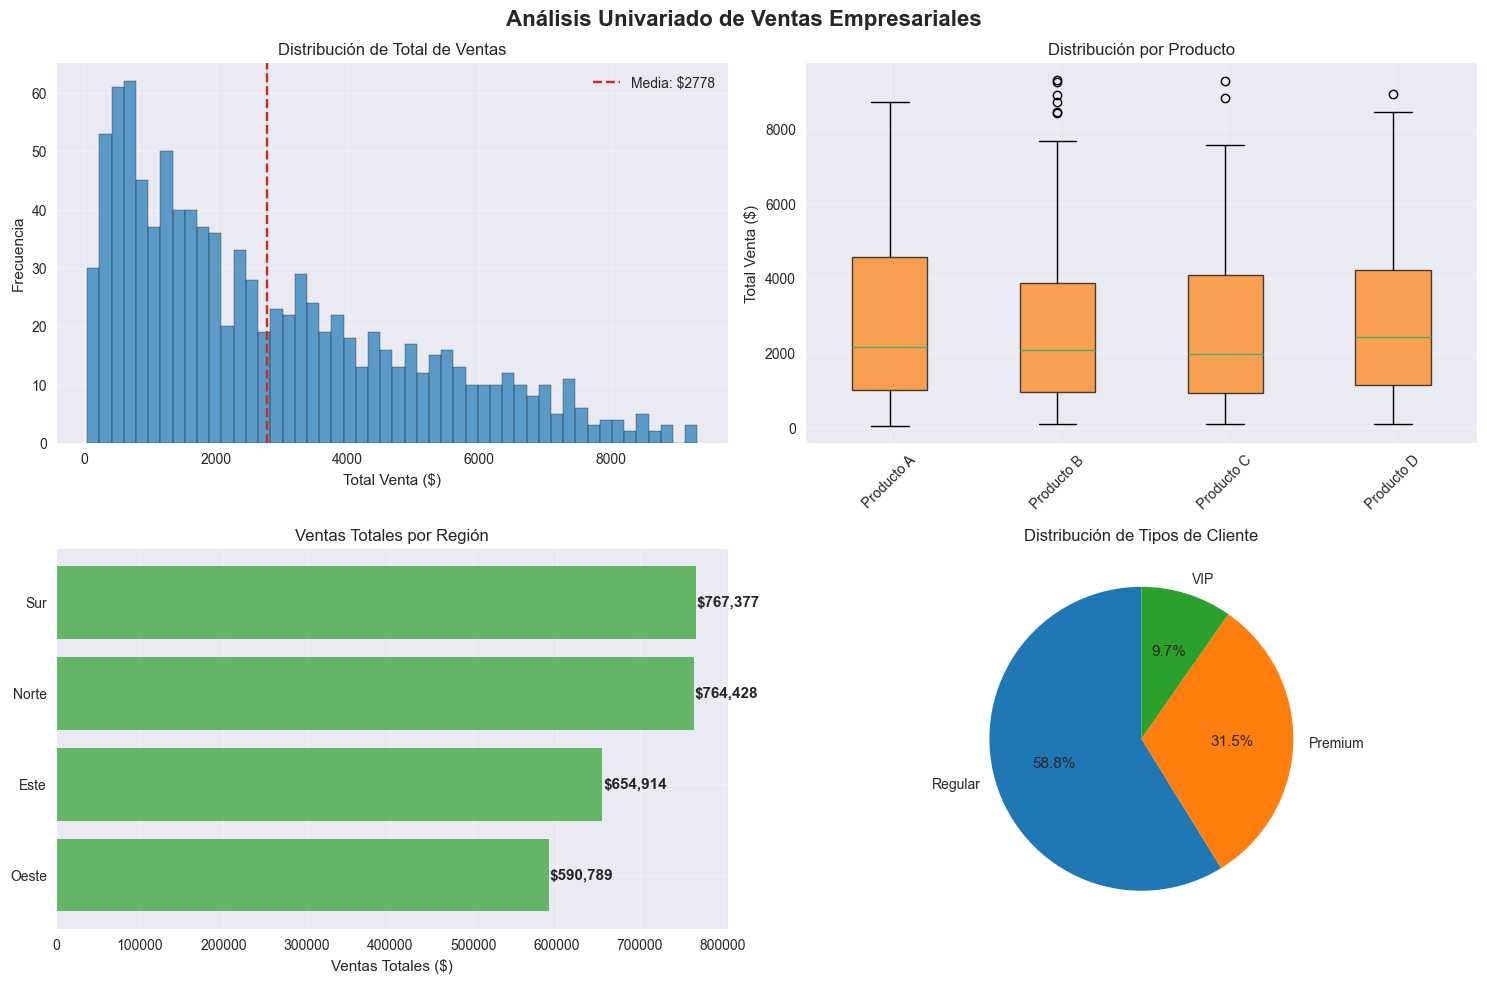

In [4]:
# Figura con múltiples análisis univariados
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Análisis Univariado de Ventas Empresariales', fontsize=16, fontweight='bold')

# 1. Histograma de total de ventas
ax1.hist(df['total_venta'], bins=50, alpha=0.7, color=colores[0], edgecolor='black')
ax1.set_title('Distribución de Total de Ventas')
ax1.set_xlabel('Total Venta ($)')
ax1.set_ylabel('Frecuencia')
ax1.axvline(df['total_venta'].mean(), color=colores[3], linestyle='--', 
            label=f'Media: ${df["total_venta"].mean():.0f}')
ax1.legend()

# 2. Box plot por producto
productos = df.groupby('producto')['total_venta'].apply(list)
bp = ax2.boxplot(productos.values, tick_labels=productos.index, patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor(colores[1])
    patch.set_alpha(0.7)
ax2.set_title('Distribución por Producto')
ax2.set_ylabel('Total Venta ($)')
ax2.tick_params(axis='x', rotation=45)

# 3. Gráfico de barras por región
ventas_region = df.groupby('region')['total_venta'].sum().sort_values(ascending=True)
bars = ax3.barh(ventas_region.index, ventas_region.values, color=colores[2], alpha=0.7)
ax3.set_title('Ventas Totales por Región')
ax3.set_xlabel('Ventas Totales ($)')
for i, (region, venta) in enumerate(zip(ventas_region.index, ventas_region.values)):
    ax3.text(venta + 1000, i, f'${venta:,.0f}', va='center', fontweight='bold')

# 4. Pie chart de tipos de cliente (con precaución)
cliente_counts = df['cliente_tipo'].value_counts()
wedges, texts, autotexts = ax4.pie(cliente_counts.values, labels=cliente_counts.index, 
                                   autopct='%1.1f%%', colors=colores[:3], startangle=90)
ax4.set_title('Distribución de Tipos de Cliente')

plt.tight_layout()
plt.savefig(ruta_outputs / 'analisis_univariado_empresarial.png', dpi=300, bbox_inches='tight')
print("\nAnálisis univariado guardado como 'analisis_univariado_empresarial.png'")

<div style="font-weight: bold; color:#611491 ; border-width: 0 0 3px 0; border-style: solid; border-color: #611491; padding: 3px; ">
    <h2>Análisis bivariado con scatter plots y series temporales</h2>
</div>

Análisis bivariado guardado como 'analisis_bivariado_empresarial.png'


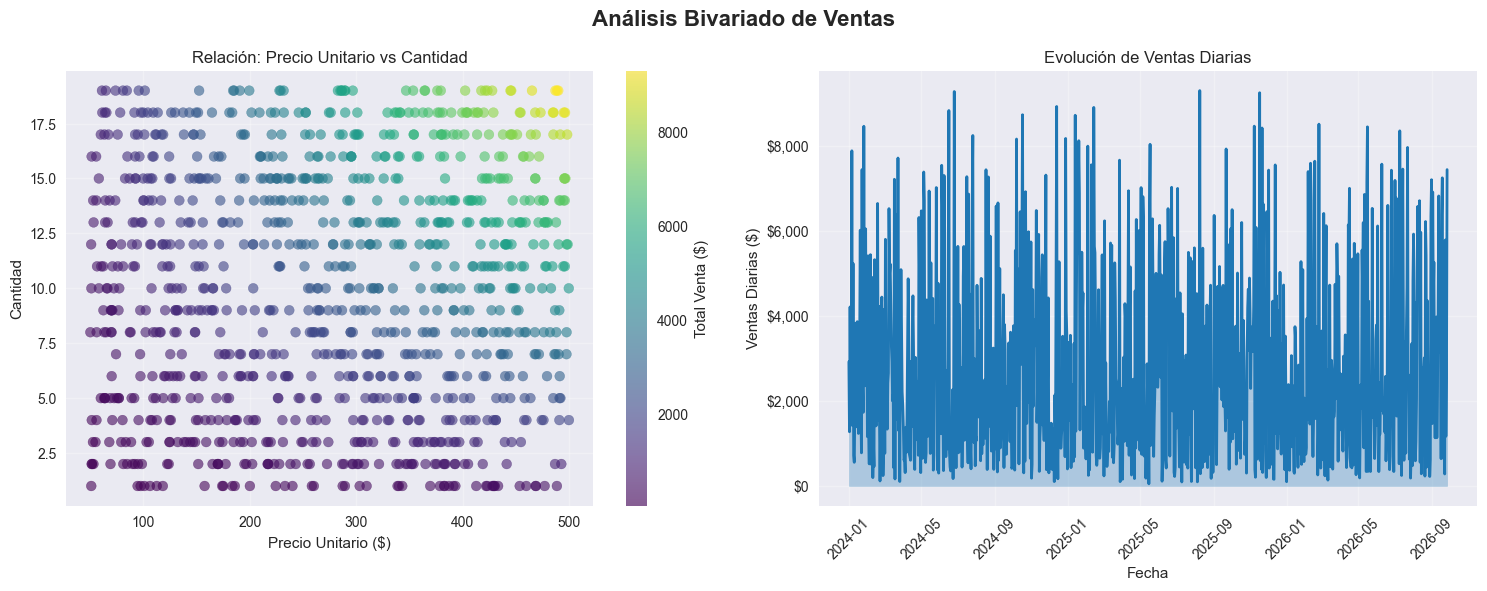

In [5]:
# Figura para análisis bivariado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Análisis Bivariado de Ventas', fontsize=16, fontweight='bold')

# 1. Scatter plot: cantidad vs precio unitario
scatter = ax1.scatter(df['precio_unitario'], df['cantidad'], 
                     c=df['total_venta'], cmap='viridis', alpha=0.6, s=50)
ax1.set_title('Relación: Precio Unitario vs Cantidad')
ax1.set_xlabel('Precio Unitario ($)')
ax1.set_ylabel('Cantidad')
plt.colorbar(scatter, ax=ax1, label='Total Venta ($)')

# 2. Serie temporal de ventas diarias
ventas_diarias = df.groupby('fecha')['total_venta'].sum()
ax2.plot(ventas_diarias.index, ventas_diarias.values, color=colores[0], linewidth=2)
ax2.fill_between(ventas_diarias.index, ventas_diarias.values, alpha=0.3, color=colores[0])
ax2.set_title('Evolución de Ventas Diarias')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Ventas Diarias ($)')
ax2.tick_params(axis='x', rotation=45)

# Formatear eje Y
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

plt.tight_layout()
plt.savefig(ruta_outputs / 'analisis_bivariado_empresarial.png', dpi=300, bbox_inches='tight')
print("Análisis bivariado guardado como 'analisis_bivariado_empresarial.png'")

<div style="font-weight: bold; color:#611491 ; border-width: 0 0 3px 0; border-style: solid; border-color: #611491; padding: 3px; ">
    <h2>Análisis</h2>
</div>

Examina los gráficos generados e identifica insights específicos sobre el negocio: ¿Qué productos son más rentables? ¿Cómo varían las ventas por región? ¿Existe estacionalidad en las ventas diarias?

<div style="font-weight:bold; color:#611491; padding: 3px">
    <h3 style="text-decoration:underline; text-decoration-color:#611491; text-decoration-thickness:3px">1. ¿Qué productos son más rentables?</h3>
</div>

El gráfico "Distribución por Producto", que se exhibe a continuación, muestra la distribución de los ingresos por transacción individual para cada producto durante el periodo completo (2 años y 9 meses).

En ese gráfico se observa que el Producto D tiene la mediana de ingresos por transacción más alta, pero esto no indica necesariamente que sea el más rentable para el negocio debido a que:

- No considera el volumen de transacciones: un producto puede tener una mediana de ingresos más baja, pero generar más ingresos totales si se vende con mayor frecuencia.
- Para calcular rentabilidad (entendida como ganancia total acumulada) se requiere conocer los ingresos, costos y el volumen de ventas del producto, y determinar el período de cálculo (semestral, anual, bianual). La información de costos no está disponible ni en el gráfico ni en el dataset.

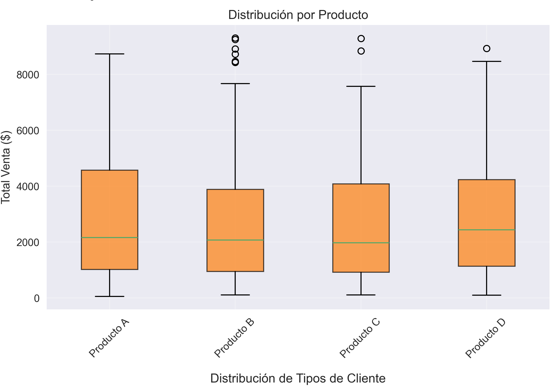

In [6]:
img = Image.open(ruta_outputs / 'analisis_univariado_empresarial.png')
width, height = img.size

img_ax = img.crop((width//2, 90, width, height//1.8))
img_ax = img_ax.resize((img_ax.width // 4, img_ax.height // 4))
display(img_ax)

<div style="font-weight:bold; color:#611491; padding: 3px">
    <h3 style="text-decoration:underline; text-decoration-color:#611491; text-decoration-thickness:3px">2. ¿Cómo varían las ventas por región?</h3>
</div>

El gráfico "Ventas Totales por Región", que se exhibe a continuación, muestra los ingresos acumulados para cada región durante el periodo completo (2 años y 9 meses), ordenados de menor a mayor (de abajo hacia arriba).

El gráfico muestra que:
- Norte y Sur presentan ingresos similares y son las regiones líderes (aprox. \$765k cada una, visible en las etiquetas del gráfico)
- Este muestra un desempeño intermedio (aprox. \$655k)
- Oeste registra los menores ingresos (aprox. \$591k)
- Se observa una brecha visible entre las regiones de mejor desempeño (Norte/Sur) y la de menor desempeño (Oeste).

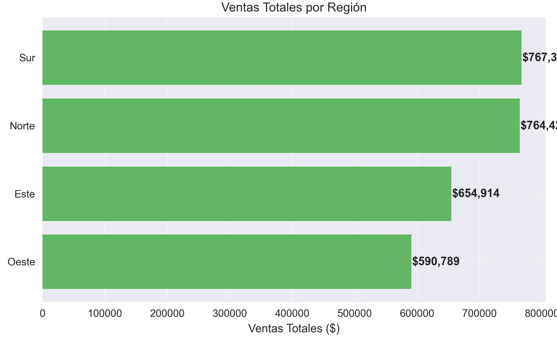

In [7]:
img_ax = img.crop((0, height//1.8 - 60, width//2, height))
img_ax = img_ax.resize((img_ax.width // 4, img_ax.height // 4))
display(img_ax)

<div style="font-weight:bold; color:#611491; padding: 3px">
    <h3 style="text-decoration:underline; text-decoration-color:#611491; text-decoration-thickness:3px">3. ¿Existe estacionalidad en las ventas diarias?</h3>
</div>

El gráfico "Evolución de Ventas Diarias", que se exhibe a continuación, muestra las ventas diarias durante un periodo de aproximadamente 2 años y 9 meses (1000 días).

No es posible identificar patrones de estacionalidad a partir de este gráfico debido a que:

- La alta densidad de datos diarios (1000 puntos) genera una visualización muy saturada donde las fluctuaciones diarias individuales dominan la imagen.
- Los patrones estacionales (si existen) quedan ocultos por el ruido de la variabilidad día a día.
Para detectar estacionalidad sería necesario aplicar técnicas de suavizado como medias móviles (por ejemplo, a 7 o 30 días) o agregaciones temporales (ventas semanales o mensuales) que permitan visualizar tendencias de mediano plazo.

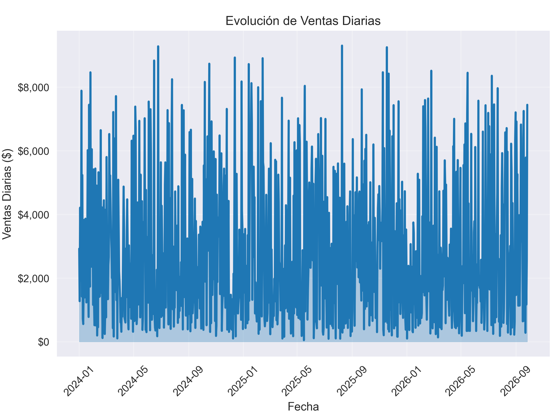

In [8]:
img = Image.open(ruta_outputs / 'analisis_bivariado_empresarial.png')
width, height = img.size

img_ax = img.crop((width//2, 90, width, height))
img_ax = img_ax.resize((img_ax.width // 4, img_ax.height // 4))
display(img_ax)